In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
covid_data = pd.read_csv('/content/state_wise_daily.csv')
covid_data.head(10)

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,19,0,0,0,14,0,0,0,0,0,0,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,2020-03-14,Recovered,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,2020-03-14,Deceased,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,18,0,0,0,0,0,0,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,2020-03-15,Recovered,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0
5,15-Mar-20,2020-03-15,Deceased,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,16-Mar-20,2020-03-16,Confirmed,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,0,0,0,6,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0
7,16-Mar-20,2020-03-16,Recovered,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,16-Mar-20,2020-03-16,Deceased,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,17-Mar-20,2020-03-17,Confirmed,11,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0


In [ ]:
covid_data.describe()

,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
count,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.0,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,42456.657990,10.522777,2600.125090,45.013738,657.027477,1036.590022,88.349964,1422.984816,14.942155,0.0,2068.822849,233.839479,1182.623283,1106.614606,286.297180,440.659436,496.230658,3929.093999,3932.675343,28.146059,13.246565,1138.774403,8493.399132,83.571222,59.774403,20.853218,32.530007,1224.739696,161.652205,847.167751,1371.637021,25.054230,3394.942155,866.813449,84.277657,2459.469993,482.201012,2115.997831,0.000000
std,77962.251475,21.190287,4875.891912,88.498721,1281.339541,2485.850289,171.298486,3181.356654,39.787418,0.0,4386.144433,542.544847,2559.593437,2545.011049,705.634349,858.162016,1182.610336,8626.773462,7952.134150,48.991187,44.874120,2495.959154,14635.408878,167.413443,148.534105,52.369562,67.168614,2497.251478,347.681556,1625.905166,3329.992605,60.547496,6799.375555,1503.832635,173.629847,6076.185364,1237.195187,4209.681378,107.457439
min,0.000000,0.000000,0.000000,0.000000,-1.000000,-2837.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5914.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-3.000000,0.000000,-1.000000,0.000000,0.000000,-2.000000,-1.000000,-374.000000,-19.000000,-1295.000000
25%,579.500000,0.000000,15.500000,0.000000,2.000000,5.000000,1.000000,7.000000,0.000000,0.0,36.000000,1.000000,16.000000,9.500000,2.000000,7.000000,2.000000,17.500000,15.000000,0.000000,0.000000,13.000000,177.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,15.000000,13.000000,0.000000,46.500000,7.000000,0.000000,28.000000,3.000000,38.000000,0.000000
50%,12069.000000,1.000000,110.000000,1.000000,32.000000,98.000000,11.000000,153.000000,0.000000,0.0,338.000000,52.000000,410.000000,153.000000,28.000000,78.000000,51.000000,413.000000,201.000000,3.000000,0.000000,219.000000,2628.000000,7.000000,2.000000,1.000000,2.000000,88.000000,20.000000,183.000000,203.000000,2.000000,576.000000,162.000000,4.000000,255.000000,56.000000,255.000000,0.000000
75%,50164.500000,12.000000,2581.000000,42.500000,575.500000,848.500000,87.000000,1380.000000,11.000000,0.0,2164.000000,192.500000,1136.000000,1076.000000,217.500000,502.000000,340.000000,3671.500000,5016.500000,39.500000,0.000000,1050.500000,9875.000000,93.000000,46.500000,12.000000,33.000000,1209.000000,126.500000,752.500000,1333.500000,20.000000,3975.500000,1354.500000,73.000000,2046.500000,399.000000,2966.000000,0.000000
max,422391.000000,149.000000,24819.000000,513.000000,6573.000000,15853.000000,963.000000,18746.000000,359.000000,0.0,28395.000000,4195.000000,15365.000000,16192.000000,5424.000000,5443.000000,8331.000000,61766.000000,99651.000000,362.000000,483.000000,14562.000000,82266.000000,1247.000000,1183.000000,345.000000,965.000000,12852.000000,2049.000000,9059.000000,29459.000000,420.000000,36184.000000,17183.000000,1066.000000,40852.000000,9642.000000,20846.000000,1043.000000


In [ ]:
covid_data.isnull().sum().value_counts()

0    42
dtype: int64

In [ ]:
covid_data['Confirmed'] = covid_data['TT']

In [ ]:
columns = ['Date','Date_YMD','Status','Confirmed']
covid_data = covid_data[columns]
covid_data.head(10)

,Date,Date_YMD,Status,Confirmed
0,14-Mar-20,2020-03-14,Confirmed,81
1,14-Mar-20,2020-03-14,Recovered,9
2,14-Mar-20,2020-03-14,Deceased,2
3,15-Mar-20,2020-03-15,Confirmed,27
4,15-Mar-20,2020-03-15,Recovered,4
5,15-Mar-20,2020-03-15,Deceased,0
6,16-Mar-20,2020-03-16,Confirmed,15
7,16-Mar-20,2020-03-16,Recovered,1
8,16-Mar-20,2020-03-16,Deceased,0
9,17-Mar-20,2020-03-17,Confirmed,11


In [ ]:
covid_data=covid_data[covid_data.Status=='Confirmed']
covid_data = covid_data.drop('Status',axis=1)
covid_data.head(10)

,Date,Date_YMD,Confirmed
0,14-Mar-20,2020-03-14,81
3,15-Mar-20,2020-03-15,27
6,16-Mar-20,2020-03-16,15
9,17-Mar-20,2020-03-17,11
12,18-Mar-20,2020-03-18,37
15,19-Mar-20,2020-03-19,27
18,20-Mar-20,2020-03-20,58
21,21-Mar-20,2020-03-21,78
24,22-Mar-20,2020-03-22,67
27,23-Mar-20,2020-03-23,102


In [ ]:
import datetime as dt

In [ ]:
covid_data['Date']=pd.to_datetime(covid_data['Date'])
covid_data['Date']=covid_data['Date'].map(dt.datetime.toordinal)

In [ ]:
y = covid_data['Confirmed']
X = covid_data['Date']

In [ ]:
print(X)

0       737498
3       737499
6       737500
9       737501
12      737502
         ...  
1368    737954
1371    737955
1374    737956
1377    737957
1380    737958
Name: Date, Length: 461, dtype: int64


In [ ]:
print(y)

0          81
3          27
6          15
9          11
12         37
        ...  
1368    71001
1371    60008
1374    62215
1377    67289
1380    62434
Name: Confirmed, Length: 461, dtype: int64


In [ ]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

SPLITTING INTO TRAINING AND TESTING TO CHECK ACCURACY

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## USING DECISION TREE 

In [ ]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
score = regressor.score(X_test, y_test)
print(score)

0.9836146158526752


### As we can see, the accuracy came out to be 98.361 %

## VISUALIZING THE DECISION TREE REGRESSOR CURVE

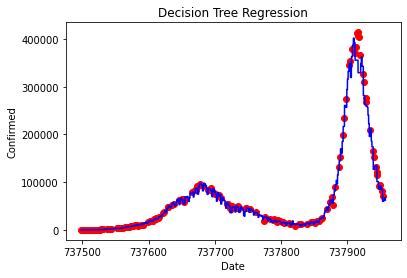

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.show()